In [71]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

# Loading and inspecting the dataset

In [8]:
class DatasetManager:
    """Handles loading and inspecting a dataset."""

    def __init__(self, file_path):
        """
        Initializes the DatasetManager with the path to the data file.
        
        Args:
            file_path (str): The path to the data file.
        """
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """
        Loads the dataset from the file path and stores it in the data attribute.
        
        Returns:
            pd.DataFrame: The loaded dataset.
        """
        self.data = pd.read_csv(self.file_path, encoding='unicode_escape')
        return self.data

    def shape_data(self):
        """
        Returns the shape of the dataset (rows, columns).
        
        Returns:
            tuple: The shape of the dataset.
        """
        if self.data is None:
            self.load_data()
        return self.data.shape

    def size_data(self):
        """
        Returns the size of the dataset (total number of elements).
        
        Returns:
            int: The size of the dataset.
        """
        if self.data is None:
            self.load_data()
        return self.data.size

    def check_columns(self):
        """
        Returns the column names of the dataset.
        
        Returns:
            Index: The column names.
        """
        if self.data is None:
            self.load_data()
        return self.data.columns

    def check_info(self):
        """
        Prints a concise summary of the dataset's info.
        """
        if self.data is None:
            self.load_data()
        return self.data.info()

    def check_null(self):
        """
        Returns the count of missing values in each column.
        
        Returns:
            pd.Series: The count of missing values for each column.
        """
        if self.data is None:
            self.load_data()
        return self.data.isnull().sum()


In [76]:
# Create an instance
df = DatasetManager("crime.csv")

# Load the data and get the head of the dataset
df.load_data().head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2018612468,2018612468299900,2999,0,criminal-mischief-other,public-disorder,9/6/2018 5:00:00 PM,9/6/2018 11:00:00 PM,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
4,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1


In [28]:
# print the shape of the dataset
df.shape_data()


(386865, 20)

In [29]:
# print the size of the dataset
df.size_data()

7737300

In [30]:
# print the column names
df.check_columns()

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic', 'victim_count'],
      dtype='object')

In [31]:
# print the info 
df.check_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             386865 non-null  int64  
 1   offense_id              386865 non-null  int64  
 2   offense_code            386865 non-null  int64  
 3   offense_code_extension  386865 non-null  int64  
 4   offense_type_id         386865 non-null  object 
 5   offense_category_id     386865 non-null  object 
 6   first_occurrence_date   386865 non-null  object 
 7   last_occurrence_date    211309 non-null  object 
 8   reported_date           386865 non-null  object 
 9   incident_address        371362 non-null  object 
 10  geo_x                   371362 non-null  float64
 11  geo_y                   371362 non-null  float64
 12  geo_lon                 371096 non-null  float64
 13  geo_lat                 371096 non-null  float64
 14  district_id         

In [32]:
# check the missing values
df.check_null()

incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      175556
reported_date                  0
incident_address           15503
geo_x                      15503
geo_y                      15503
geo_lon                    15769
geo_lat                    15769
district_id                   57
precinct_id                    0
neighborhood_id              689
is_crime                       0
is_traffic                     0
victim_count                   0
dtype: int64

# Visualizing the missing values

In [78]:
df = df.load_data()

<Axes: >

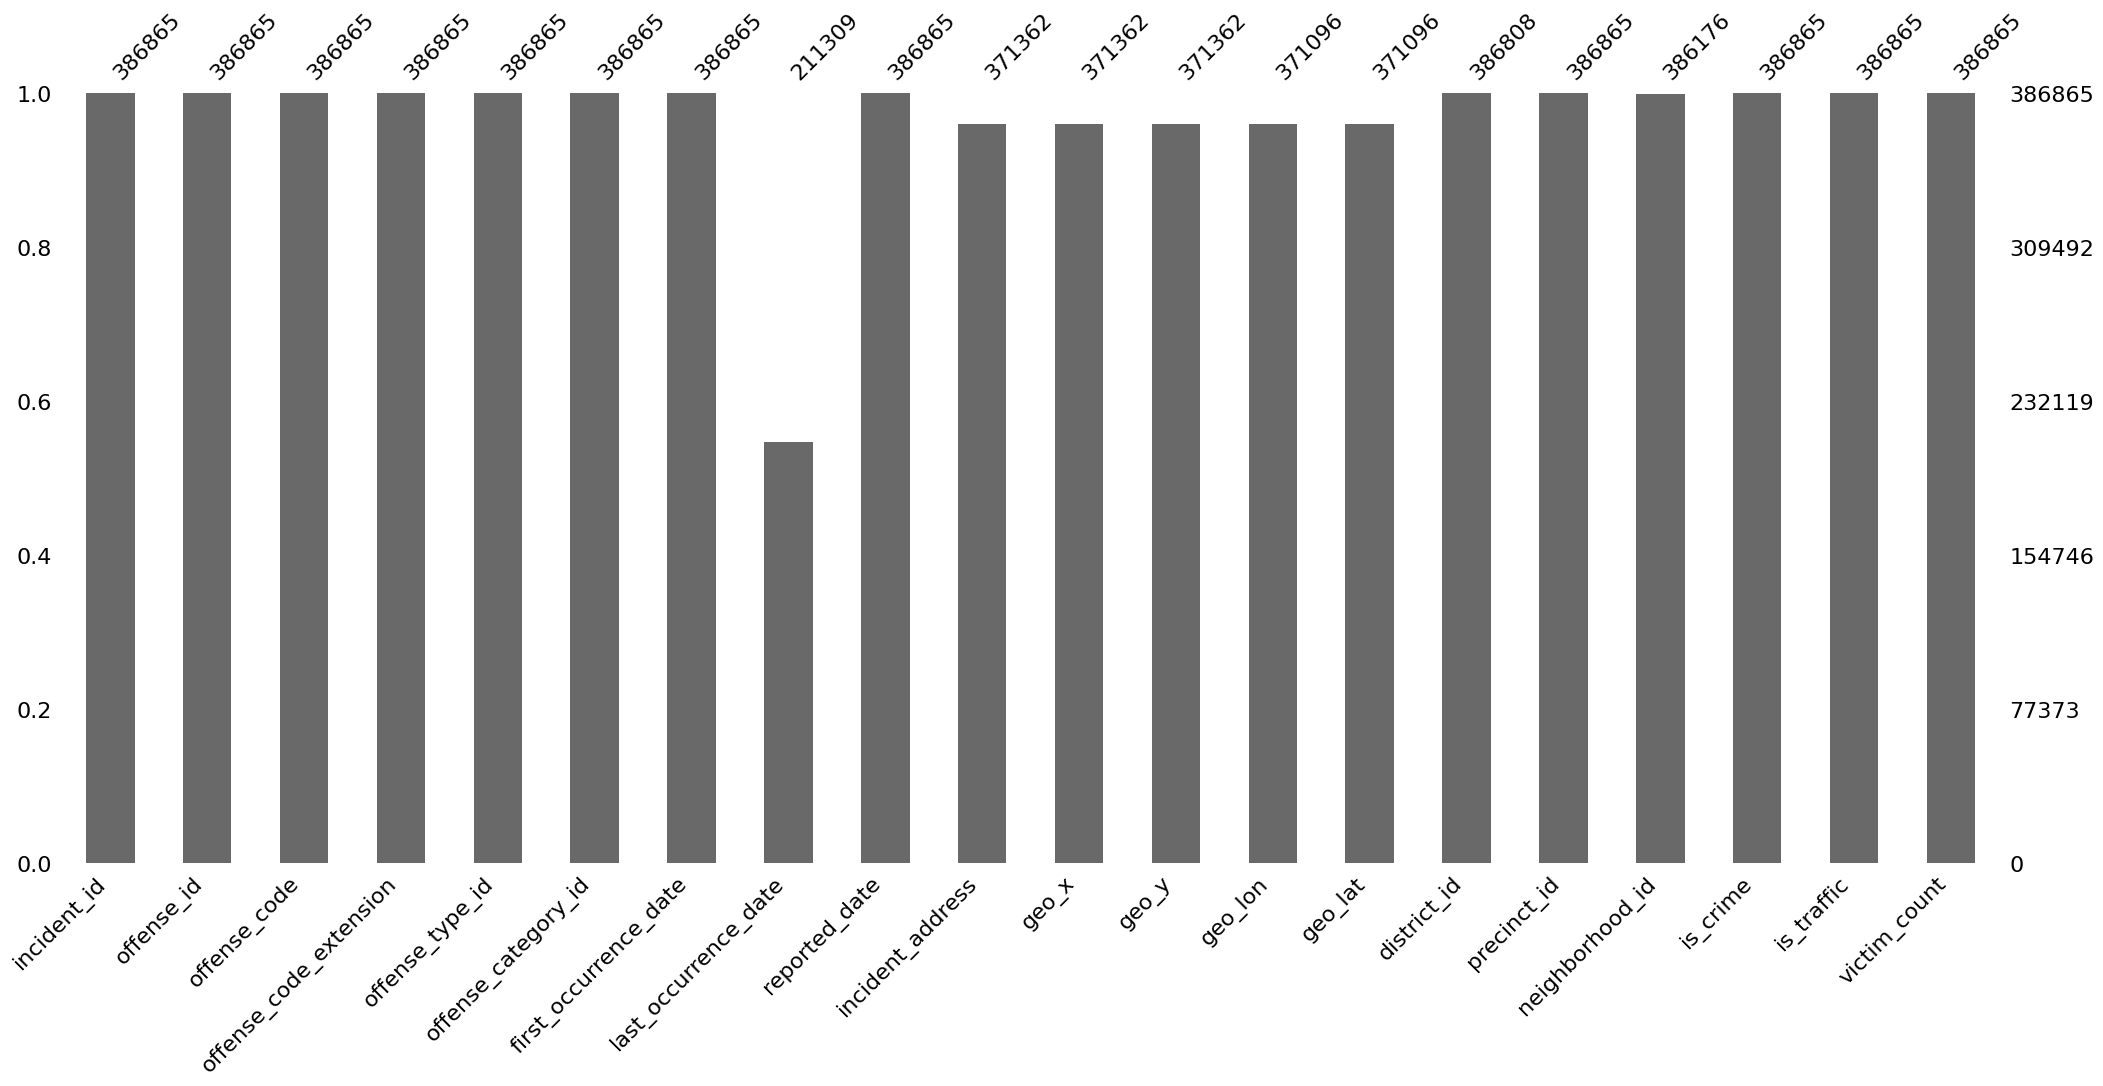

In [45]:
# visualize the missing values
msno.bar(df)

The msno.bar shows that the variable `last_occurrence_date` is missing around `50%` of its values. 

<Axes: >

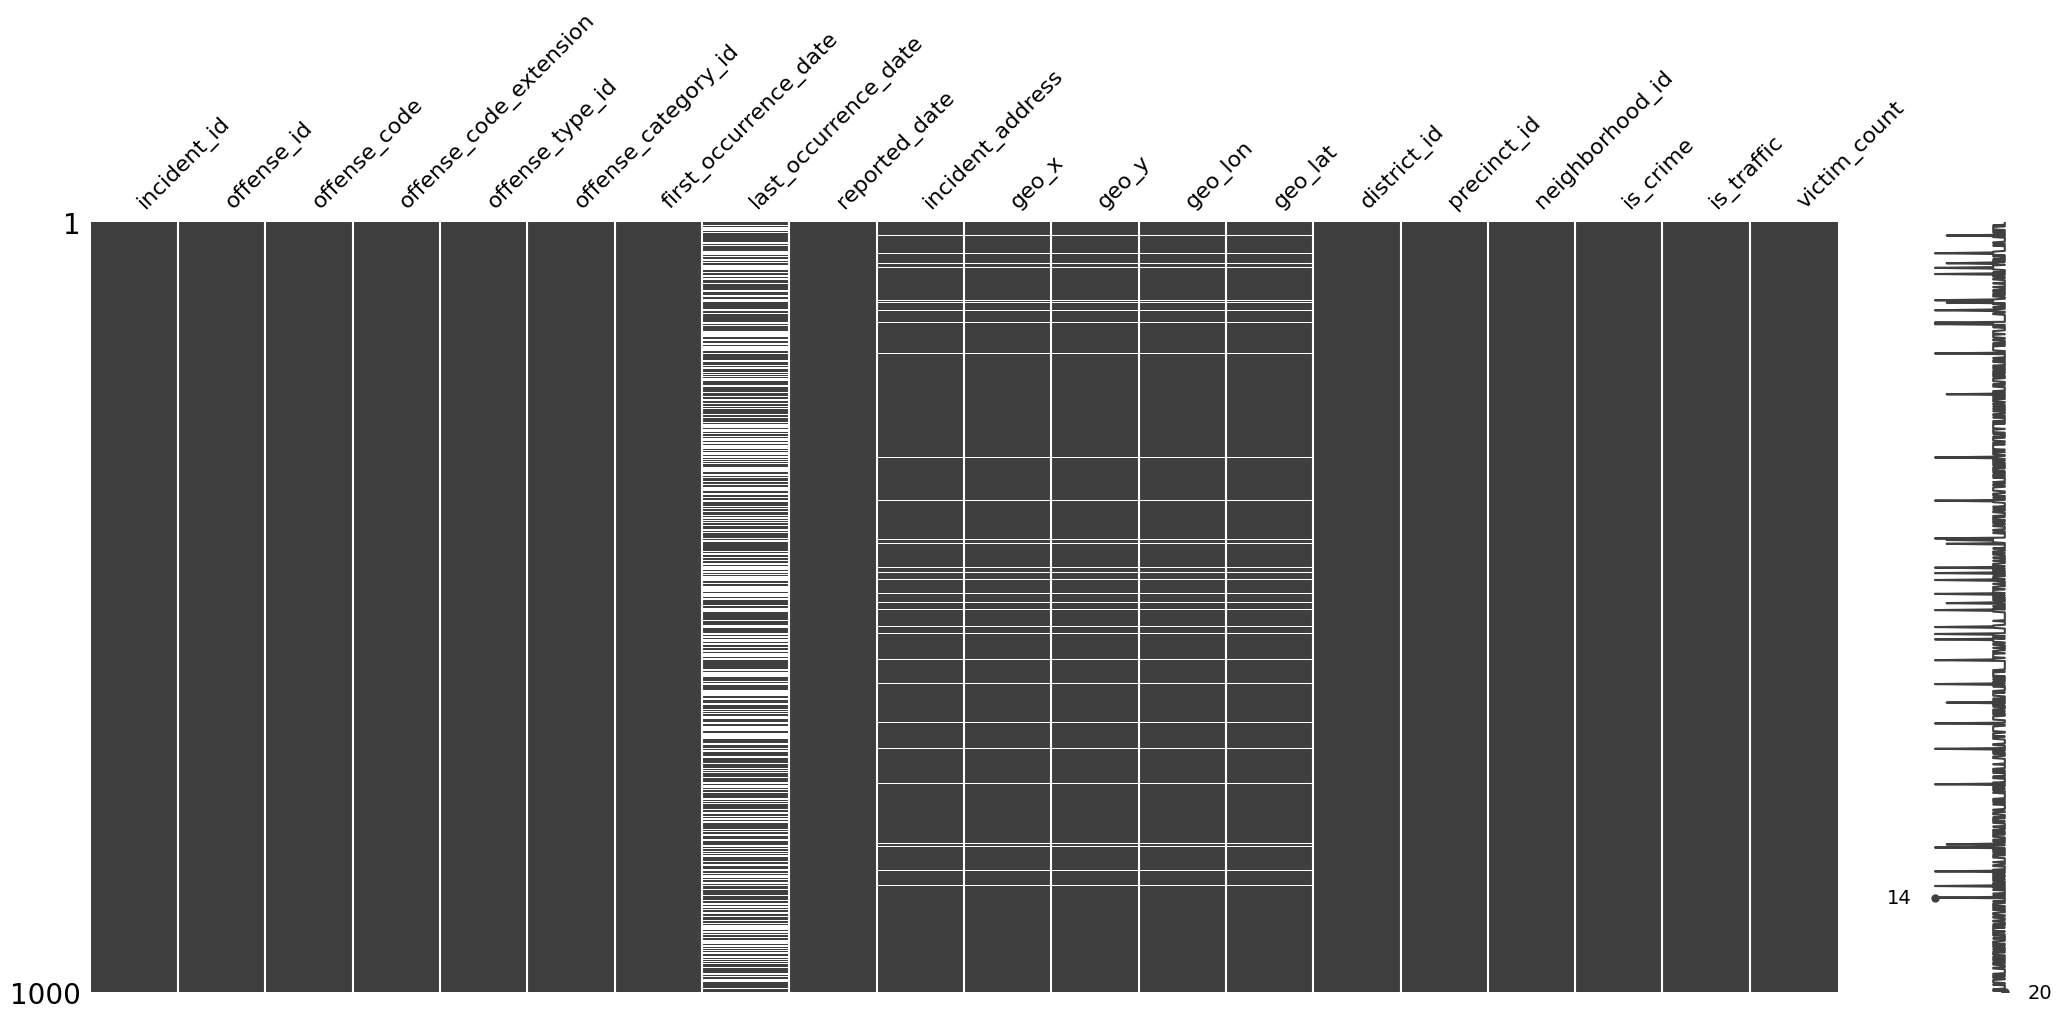

In [46]:
# Take a sample of 1000 to visualize the location of the missing values
msno.matrix(df.sample(1000))

<Axes: >

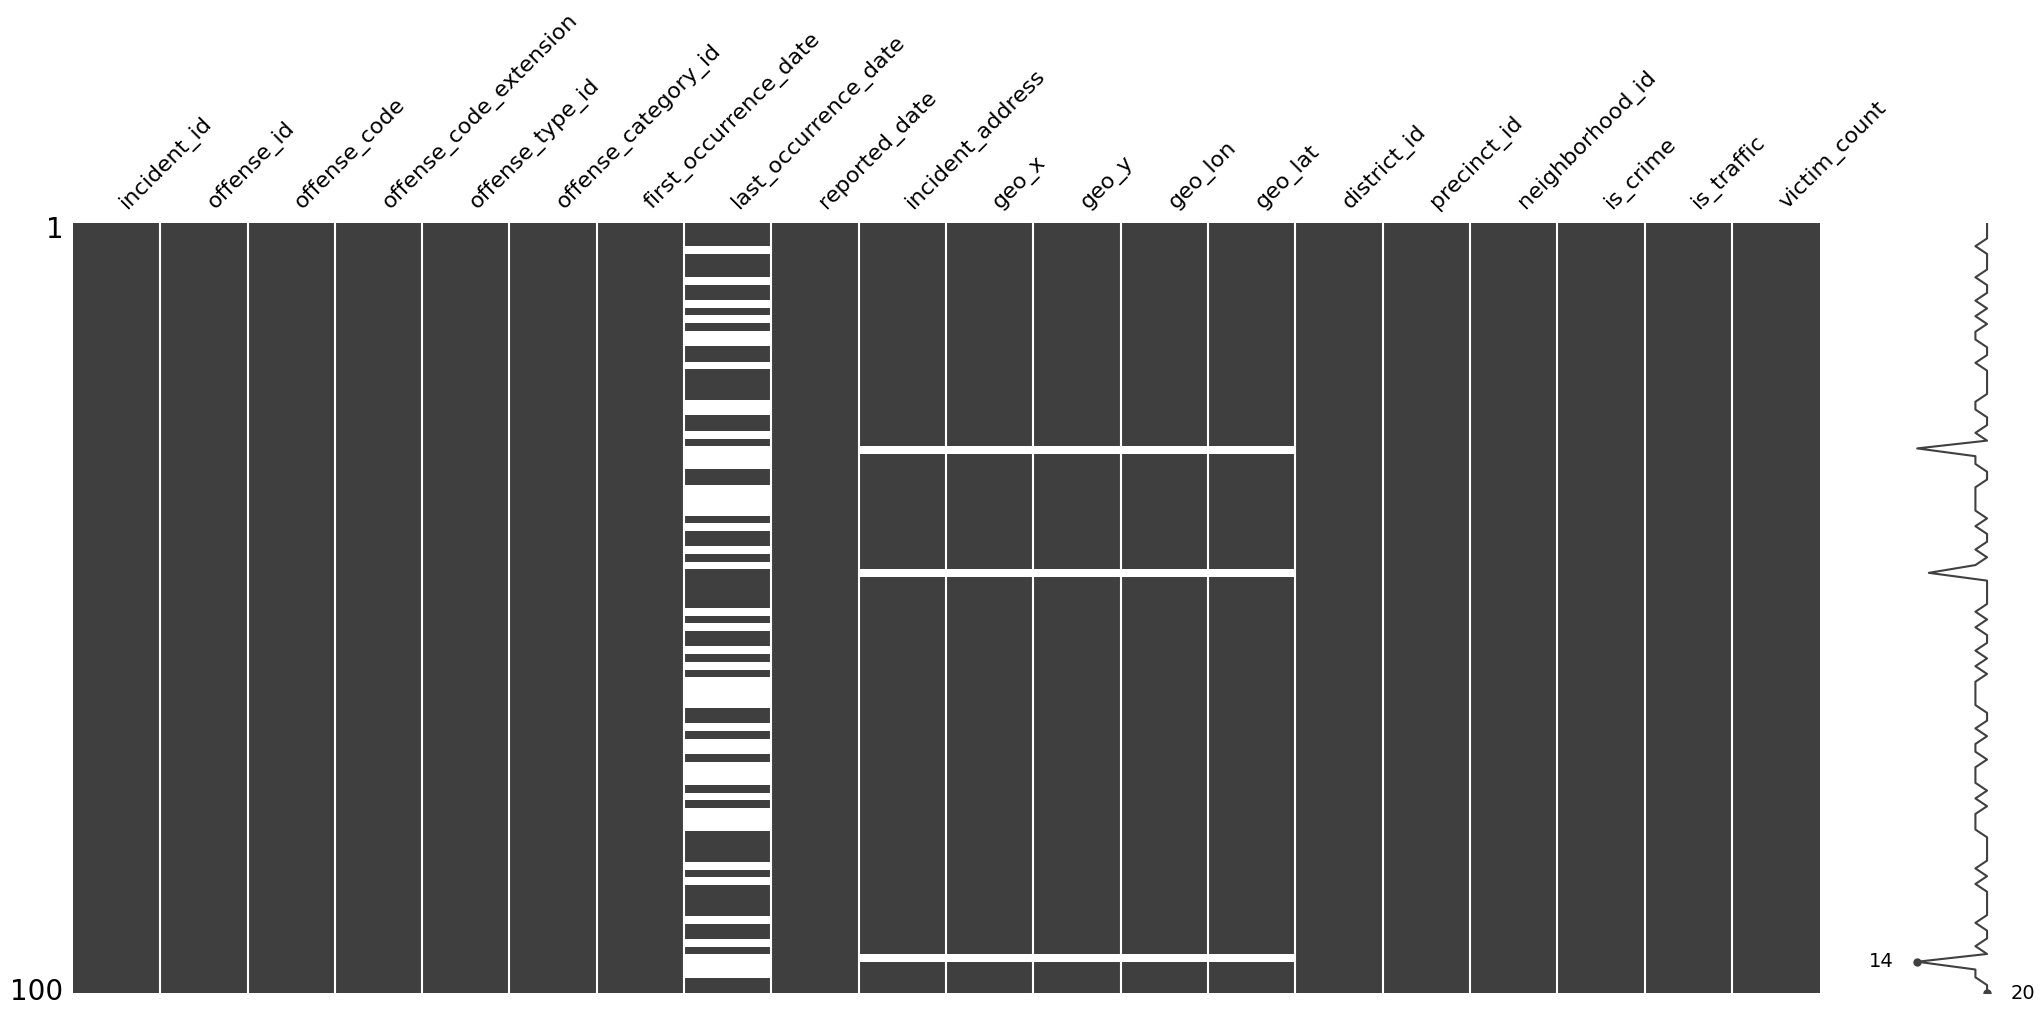

In [47]:
# Take a sample of 100 to visualize the location of the missing values
msno.matrix(df.sample(100))

<Axes: >

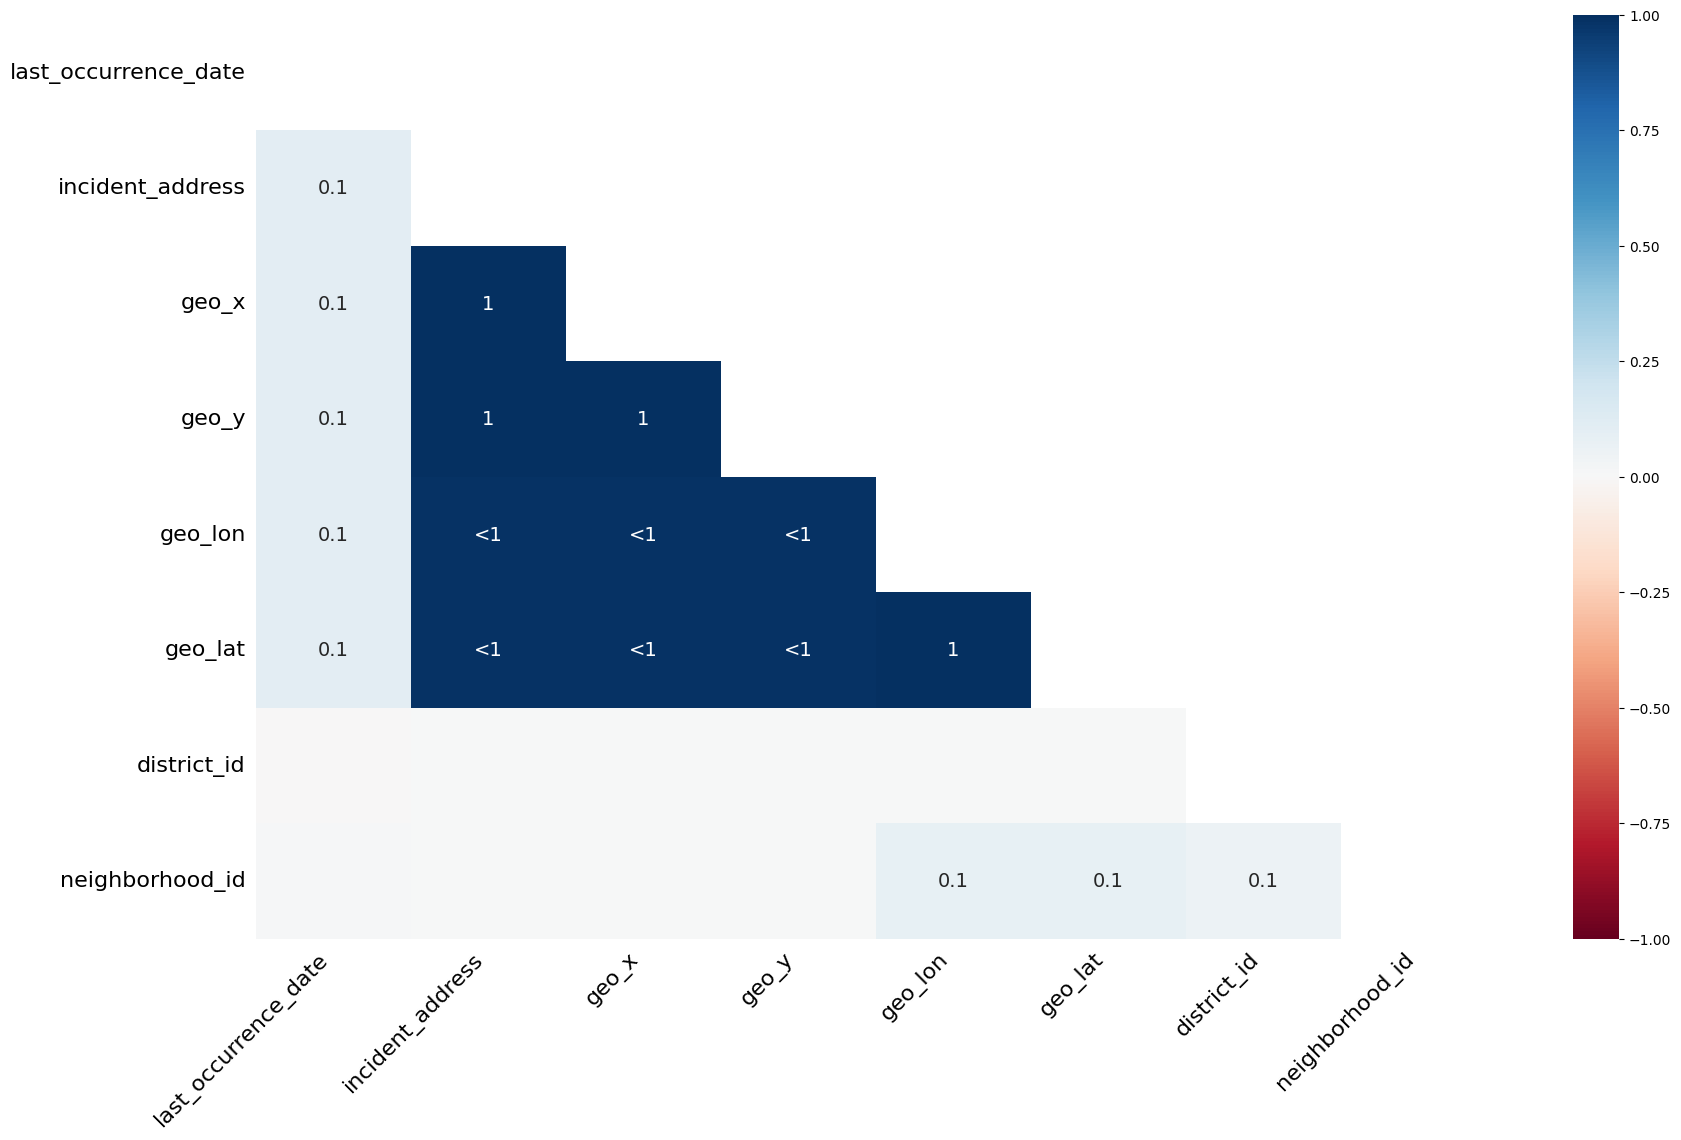

In [51]:
msno.heatmap(df)

The heatmap reveals a perfect correlation between missing values in several columns (`geo_x, geo_y, geo_lat, incident_address, and geo_loc`), indicating that missing values in one column are consistently associated with missing values in another. This pattern suggests that the missing data is likely Missing at Random `(MAR)`, meaning that the missingness is related to other observed data but not to the missing values themselves.

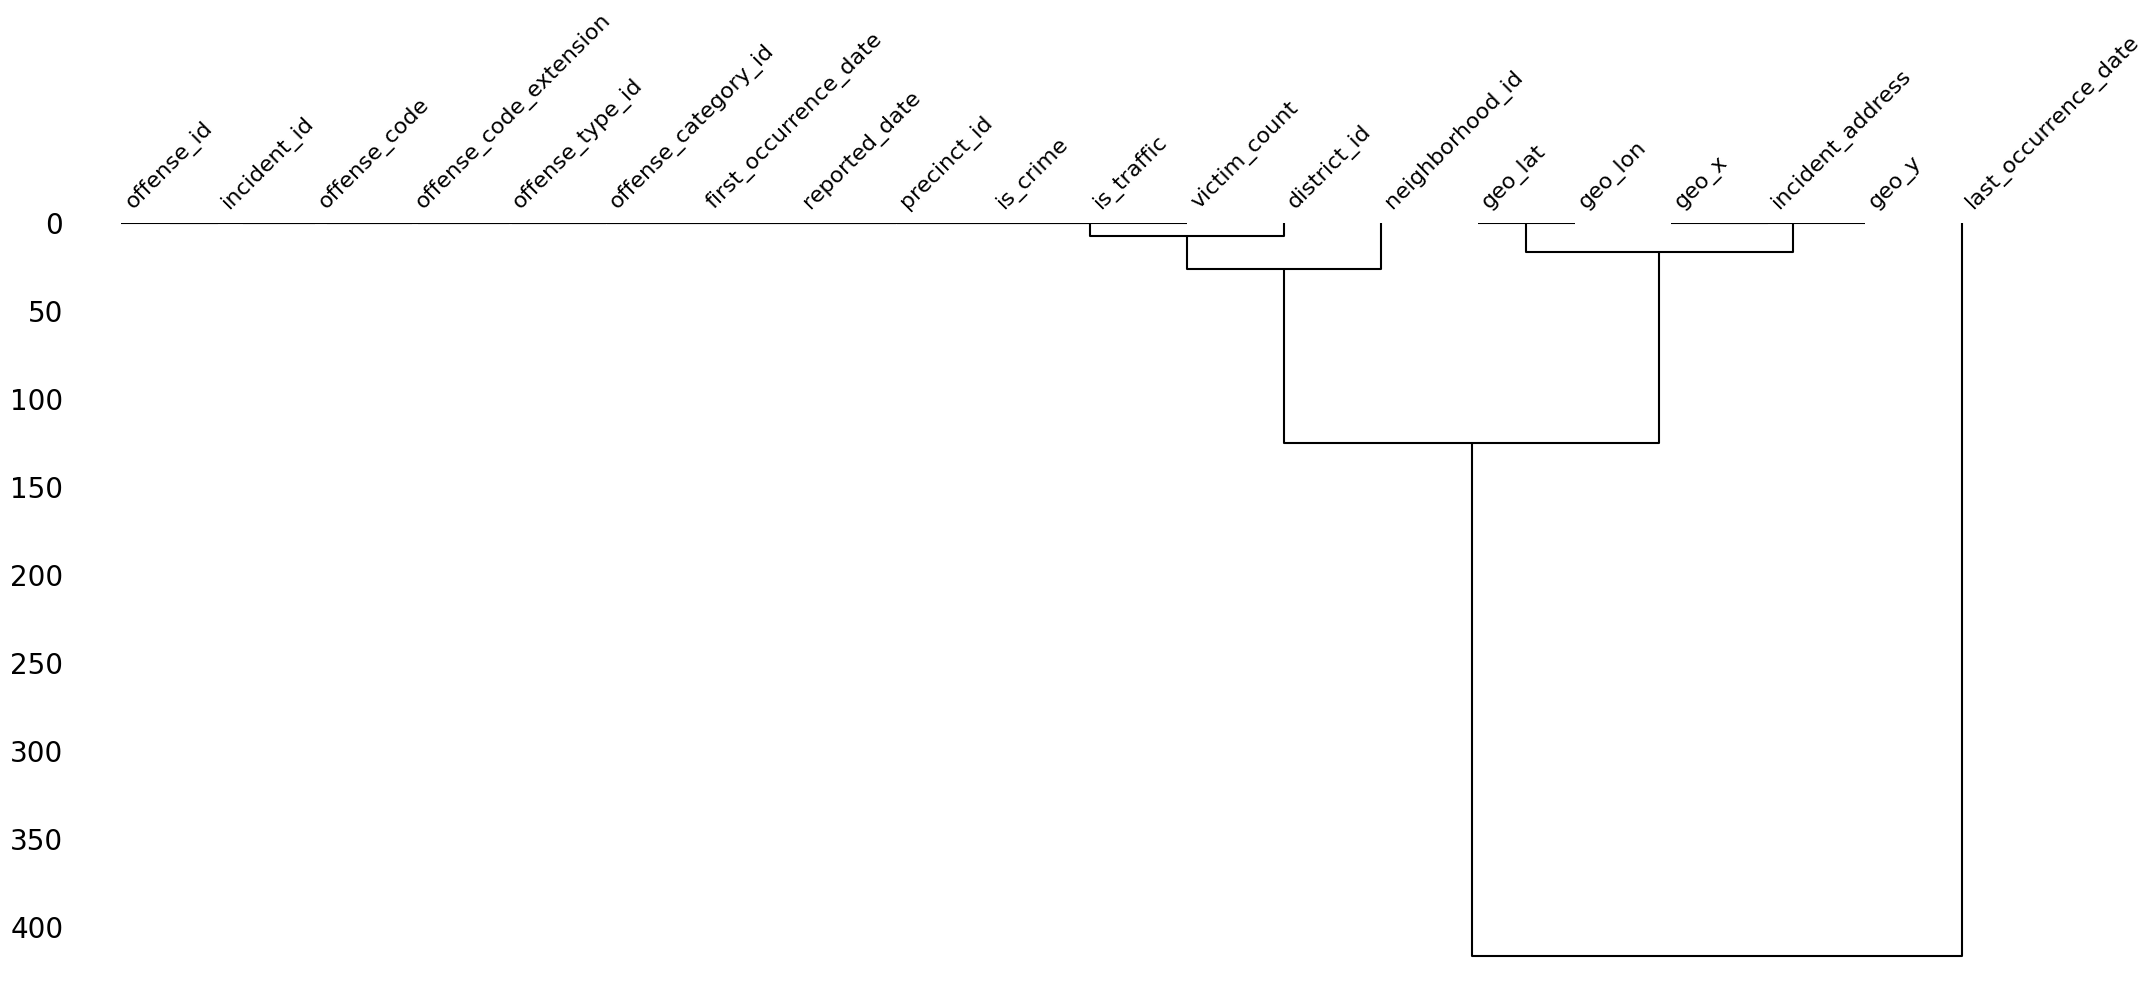

In [81]:
msno.dendrogram(df)
plt.savefig("df")

The `dendrogram` provides a visual representation of how columns are clustered based on the similarity of their missingness patterns:

- **Shorter Vertical Lines**: Columns that are connected by shorter vertical lines are more closely related in terms of their missingness patterns. They tend to have missing values together more frequently.
- **Longer Vertical Lines**: Columns connected by longer vertical lines are less closely related. Their missingness patterns are less similar compared to those with shorter line.


The `dendrogram` indicates that `incident_address and geo_lat` share more similar missingness patterns compared to `geo_lat and last_occurrence_date`. This is because the shorter vertical line between incident_address and geo_lat suggests a closer similarity in missingness patterns.